# **Importing Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import PIL
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Loading Data**

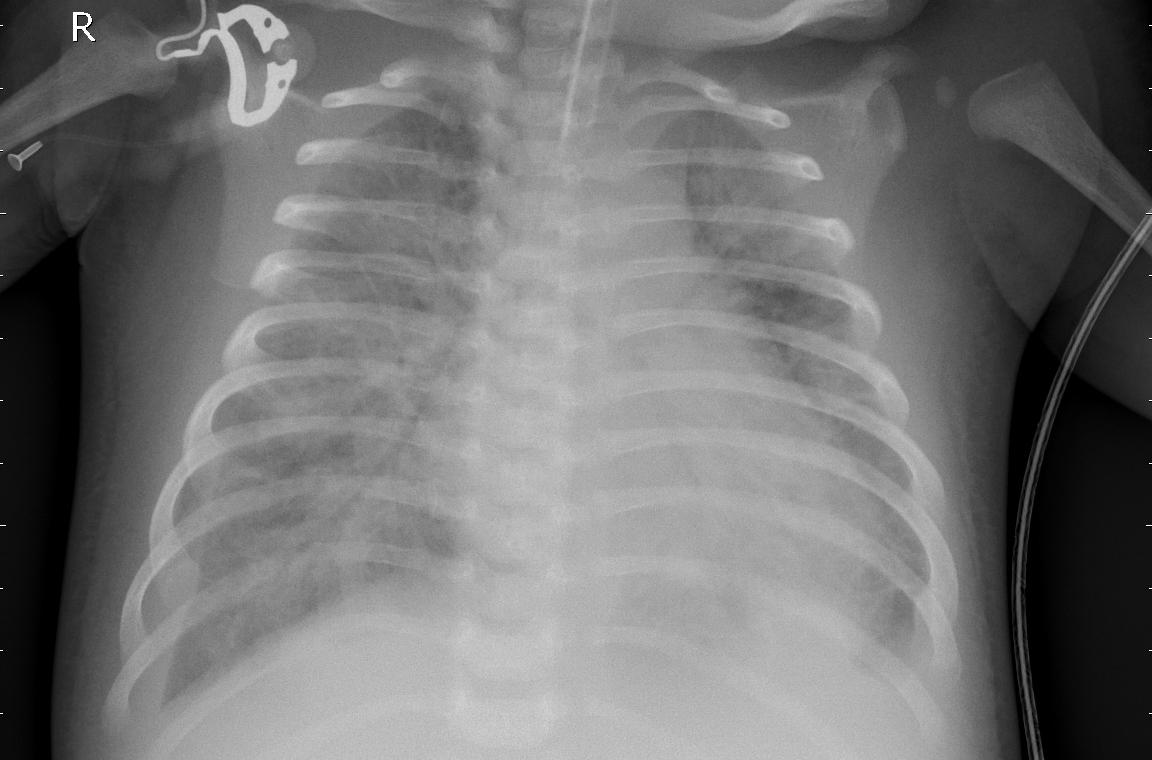

In [6]:
image = PIL.Image.open('dataset/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
image

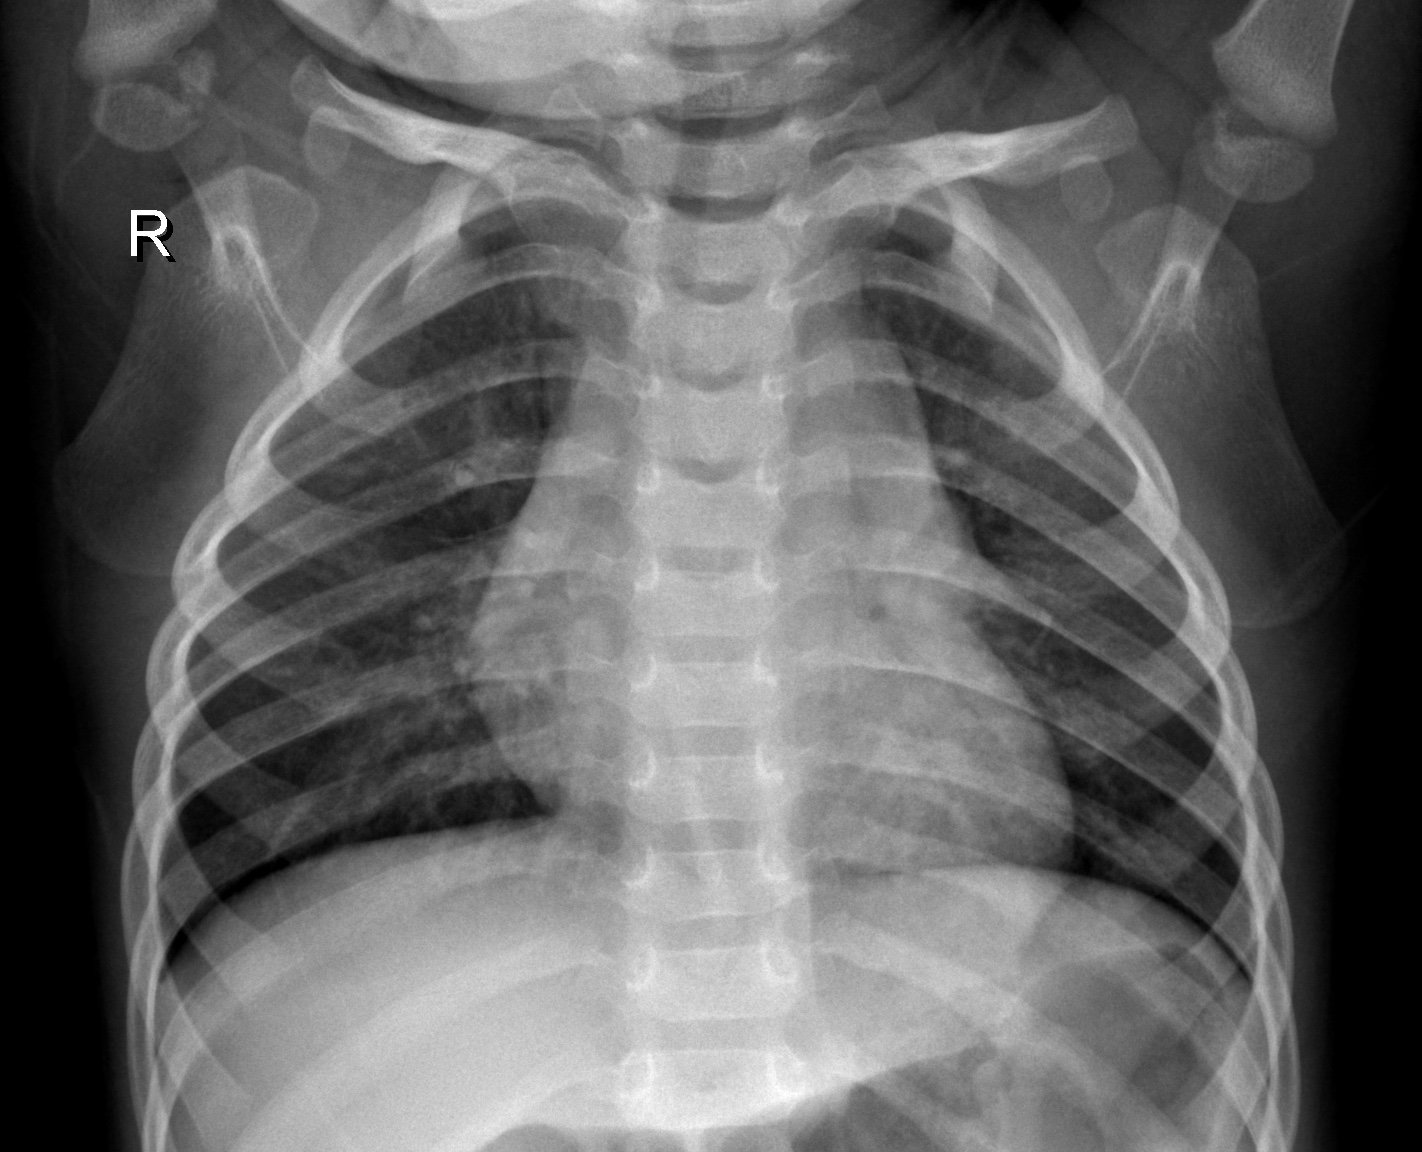

In [3]:
image_normal = PIL.Image.open('dataset/chest_xray/train/NORMAL/IM-0117-0001.jpeg')
image_normal

In [4]:
train_dir = 'dataset/chest_xray/train'
training_generator = ImageDataGenerator(rescale = 1/255)
train_data = training_generator.flow_from_directory(train_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [5]:
valid_dir = 'dataset/chest_xray/val'
validation_generator = ImageDataGenerator(rescale = 1/255)
valid_data = validation_generator.flow_from_directory(valid_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [6]:
test_dir = 'dataset/chest_xray/test'
testing_generator = ImageDataGenerator(rescale = 1/255)
test_data = testing_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 624 images belonging to 2 classes.


# **CNN**

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [11]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 211s 318ms/step - acc: 0.7388 - loss: 0.5987 - val_acc: 0.6250 - val_loss: 0.6431
Epoch 2/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 212s 324ms/step - acc: 0.8907 - loss: 0.2561 - val_acc: 0.6250 - val_loss: 1.1625
Epoch 3/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 161s 243ms/step - acc: 0.9328 - loss: 0.1667 - val_acc: 0.9375 - val_loss: 0.1637
Epoch 4/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 146s 222ms/step - acc: 0.9601 - loss: 0.1030 - val_acc: 0.9375 - val_loss: 0.1650
Epoch 5/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 149s 226ms/step - acc: 0.9698 - loss: 0.0742 - val_acc: 1.0000 - val_loss: 0.0922
Epoch 6/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 152s 231ms/step - acc: 0.9723 - loss: 0.0737 - val_acc: 0.8750 - val_loss: 0.4142
Epoch 7/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 164s 250ms/step - acc: 0.9764 - loss: 0.0570 - val_acc: 0.6875 - val_loss: 0.6631
Epoch 8/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 164s 249ms/step - acc: 0.9865 - loss: 0.0422 - val_acc: 0.9375 - val_loss: 0.2341
Epoch 9/10
652/652 ━━━━━

In [12]:
model.evaluate(test_data)

78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 227ms/step - acc: 0.6900 - loss: 2.1403


[1.9160369634628296, 0.7195512652397156]

In [13]:
predictions = model.predict(test_data)

78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


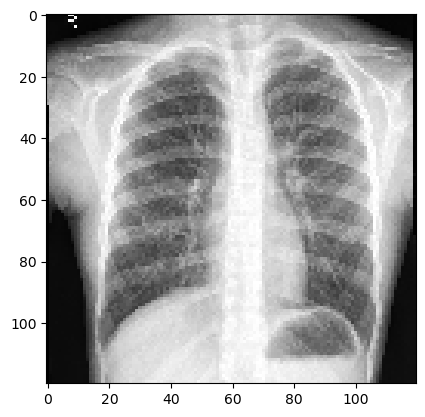

The probability of Pneumonia is:  [0.9986554]


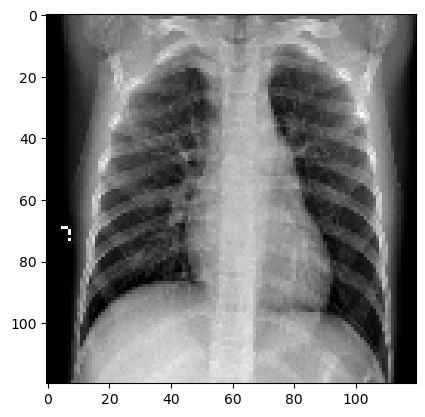

The probability of Pneumonia is:  [0.9973222]


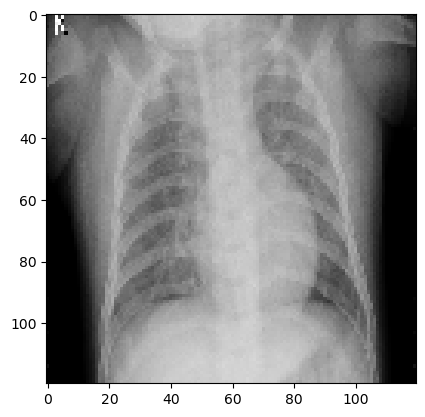

The probability of Pneumonia is:  [0.9999998]


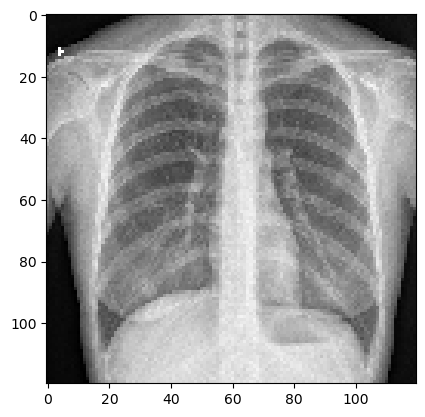

The probability of Pneumonia is:  [0.99925566]


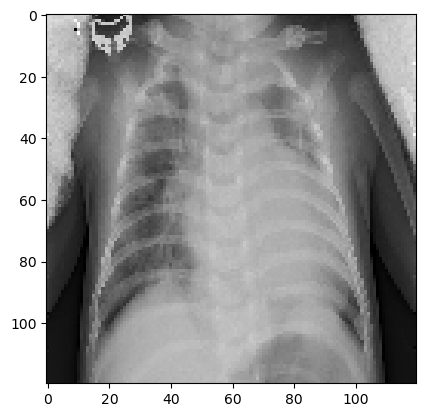

The probability of Pneumonia is:  [1.]


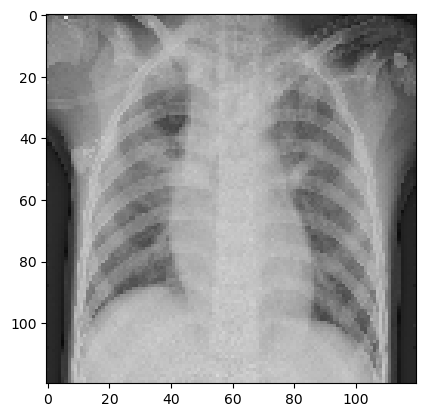

The probability of Pneumonia is:  [0.99997276]


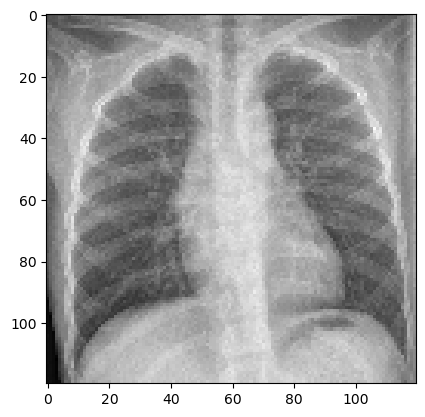

The probability of Pneumonia is:  [0.8981396]


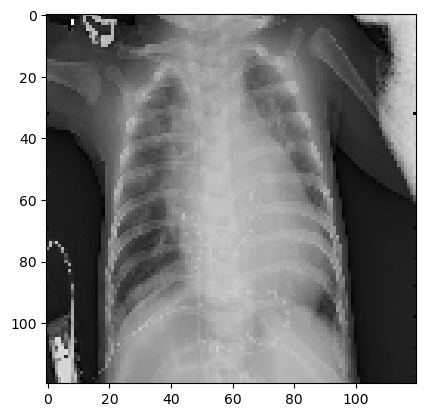

The probability of Pneumonia is:  [1.]


In [14]:
batch_size = test_data.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test_data)
    predictions = model.predict(x)
    
    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])

### Saving the model

In [16]:
import pickle

pickle.dump(model, open("cnn_model.pkl","wb"))